In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
class Ising2D:
    def __init__(self,system,J,N,T,H,steps):
        #initialize the system variables 
        
        if system == "aligned":
            self.system = np.ones((N,N), dtype=int)      # N x N matrix of dipoles with spin up (1)
        elif system == "random":
            self.system =  2*np.random.randint(2, size = (N,N)) - 1     # N x N matrix of dipoles with spin up (1) or spin down (-1)
        else:
            print("Invalid system argument: input 'aligned' or 'random'")
            
        self.J      = J 
        self.N      = N           # Number of lattice points (dipoles) in the system
        self.T      = T           # Temperature of system
        self.H      = H           # External magnetic field
        self.steps  = steps       # Number of monte carlo steps 
        
        #initialize system parameters
        
        self.E_tot  = self.getTotalEnergy()
        self.M      = np.sum(self.system.astype(float))/(self.N**2)
        
    def getNeighbors(self,i,j):
        neighborhood =  self.system[(i+1)%self.N, j] + self.system[i,(j+1)%self.N] + self.system[(i-1)%self.N, j] + self.system[i,(j-1)%self.N]
        return neighborhood
        
    def getEnergy(self,i,j):
        s = self.system[i,j]
        neighborhood = self.getNeighbors(i,j)
        energy = ((-s * neighborhood) - (self.H * s))
        return energy
        
    def getTotalEnergy(self):
        energy = 0
        for i in range(self.N):
            for j in range(self.N):
                energy += self.getEnergy(i,j)
        return energy/2
        
        
    def getMagnetization(self):
        self.M = np.sum(self.system.astype(float))/(self.N**2)
    
    def metropolisStep(self,i,j):
        #calculate the contribution to energy at the specified lattice point before flipping spin
        #print(self.system)
        #print(self.E_tot)
        beta = 1/self.T
        E_i = self.getEnergy(i,j)
        #print('initial energy:', E_i)
        #flip the spin at position i,j
        self.system[i,j] *= -1
        #calculate the contribution to energy at specified lattice point after flipping spin
        E_f = self.getEnergy(i,j)
        #print('final energy:', E_f)
        dE = E_f - E_i
        #if the change in energy is negative, update the system energy and keep flipped spin. Do the same if Boltzman condition is satisfied. If not flip the spin back and do not update energy
        if dE < 0:
            #print('flip accepted')
            self.E_tot += dE
        elif np.random.rand() < np.exp(-beta*dE):
            #print('flip accepted by chance')
            self.E_tot += dE
        else:
            #print('flip rejected')
            self.system[i,j] *= -1
        self.getMagnetization()
            
    def run(self):
        for l in range(self.steps):
            i = np.random.randint(self.N)
            j = np.random.randint(self.N)
            self.metropolisStep(i,j)
    
    def test(self):
        M = []
        for l in range(self.steps):
            i = np.random.randint(self.N)
            j = np.random.randint(self.N)
            self.metropolisStep(i,j)
            M.append(self.M)
        return M
            
    def changingTemp(self,temps):
        a1 = np.linspace(0.0001, 2, 10)
        a2 = np.linspace(2, 3, 100)
        a3 = np.linspace(3,10,80)
        a4 = np.linspace(10,30,100)
        temp_array = np.concatenate((a1, a2,a3))
        temp_array_hot = np.concatenate((a1,a2,a3,a4))
        if temps == "cool":
            temps = temp_array.flip()
        elif temps == "heat":
            temps = temp_array
        elif temps == "hotcool":
            temps = temp_array_hot.flip()
        else:
            print("Error: invalid temps argument")
            return
        E = []
        M = []
        for i in np.nditer(temps):
            self.T = i
            self.run()
            E.append(self.E_tot)
            M.append(self.M)
        return E,M,temps
        
        
        
   

In [36]:
N = 25
T = 10
J = 1
H = 0
steps = 2500


Ising = Ising2D('aligned',J,N,T,H,steps)
#Ising.run()

In [37]:
E,M,temps = Ising.changingTemp('heat')

def mag(T):
    z = np.exp(-2/T)
    if T > 2.269185:
        return 0
    else:
        return (((1 + z**2)**(.25))*(1-6*z**2 + z**4)**(.125))/np.sqrt((1-z**2))

mags = []
for i in np.nditer(temps):
    mags.append(mag(i))

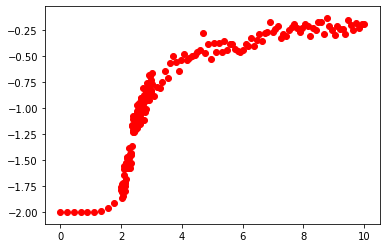

In [38]:
plt.scatter(temps,np.array(E)/625, color = 'r')
#plt.scatter(temps,M, color = 'b')
#plt.plot(temps,mags)
plt.show()
        

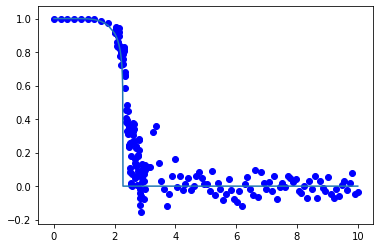

In [39]:
plt.scatter(temps,M, color = 'b')
plt.plot(temps,mags)
plt.show()